In [63]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot
import keras

from IPython.display import SVG
import numpy as np

![title](./dog_cat.png)

## Cat vs Dog Kaggle competition using CNN

### Competition URL address: https://www.kaggle.com/c/dogs-vs-cats

### Datasets

1) Combined 25000 images of cats and dogs (12500 each) for the training set

2) Combined 5000 images of cats and dogs (2500 each) for the test set

### Goal of the project

To deploy various CNN architecture to explore limitations of each model and discover difficulties that come with applying image classification using CNN deep learning architecture.

## Downloading some pre-built CNN models that can be used in Keras

As to why I did this will become more lucid later in the project.

In [5]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 85s 0us/step


In [6]:
resnet_model = keras.applications.resnet50.ResNet50()

102858752/102853048 [==============================] - 27s 0us/step


In [10]:
inception_model = keras.applications.inception_v3.InceptionV3()

96116736/96112376 [==============================] - 21s 0us/step


In [46]:
xception_model = keras.applications.xception.Xception()

91889664/91884032 [==============================] - 31s 0us/step


In [9]:
dir(keras.applications)

['InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'ResNet50',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'resnet50',
 'vgg16',
 'vgg19',
 'xception']

#### I also wanted to try and utilize DenseNet architecture, but I guess my Keras version is not as up-to-date. In the current project, I'll mainly stick with my own simple version of CNN, VGG16, Xception and InceptionV3 model and compare their performance.

## 1) Simple, self-built CNN architecture

The train data set contain 10,000 images of dogs and cats repectively (20000 total) while the validation set contains 2,500 images of each category (5000 total). This was split from the initial 25000 training data. The dataset can be found in the Dog vs. Cat Kaggle competition webpage given below:

  * https://www.kaggle.com/c/dogs-vs-cats

#### References to simple CNN structure I utilized here
  * https://pythonprogramming.net/tflearn-machine-learning-tutorial/
  * 블록과 함께하는 파이썬 딥러닝케라스 by 김태영 (This is a really nice Keras textbook written by the group    leader of Keras Korea. Unfortunately, translated version is not available)
  * Keras tutorial series on Youtube by **deeplizard crypto & ai**:
  https://www.youtube.com/watch?v=LhEMXbjGV_4&t=378s

In [34]:
'''Specify how many images I want to grab at each iteration'''
BATCH_SIZE = 100

'''Create ImageGenerators to fetch data from respective directory. Notice division by 255.0 is for scaling'''
train_datagen = ImageDataGenerator(rescale = 1 / 255.0)
test_datagen = ImageDataGenerator(rescale = 1 / 255.0)

train_generator = train_datagen.flow_from_directory('./data/train', target_size = (28, 28), 
                                                   batch_size = BATCH_SIZE, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('./data/test', target_size = (28, 28),
                                                 batch_size = BATCH_SIZE, class_mode = 'categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [35]:
'''Model building using Sequential model of Keras'''
model_simple = Sequential()

model_simple.add(Conv2D(32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 3)))
model_simple.add(Conv2D(64, padding = 'same', kernel_size = (3, 3), activation = 'relu'))
model_simple.add(MaxPooling2D(pool_size = (2, 2)))
model_simple.add(Flatten())
model_simple.add(Dense(1024, activation = 'relu'))
model_simple.add(Dense(2, activation = 'softmax'))

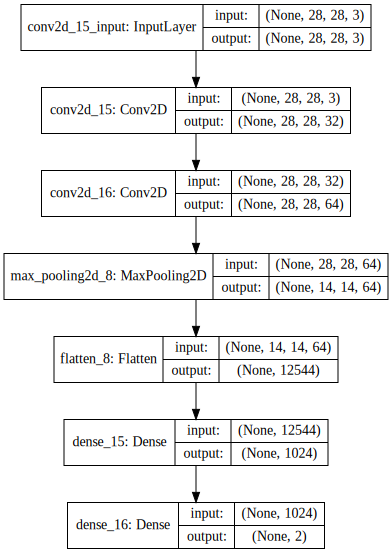

In [36]:
'''Visualize the model structure'''
SVG(model_to_dot(model_simple, show_shapes = True).create(prog = 'dot', format = 'svg'))

In [ ]:
'''Model compiling with loss and optimizer criteria'''
'''From the sources I have been reading, categorical_crossentropy is a more popular loss metric over
mse, and adam is a popular optimizer over sgd.'''
model_simple.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
'''Model fitting with train and validation batch steps specified'''
model_simple.fit_generator(train_generator, steps_per_epoch = 20000 / BATCH_SIZE, epochs = 50,
                          validation_data = test_generator, validation_steps = 4 * (5000 / BATCH_SIZE))

Epoch 1/50
200/200 [==============================] - 238s 1s/step - loss: 0.6579 - acc: 0.6397 - val_loss: 0.5789 - val_acc: 0.6926
Epoch 2/50
200/200 [==============================] - 237s 1s/step - loss: 0.5479 - acc: 0.7176 - val_loss: 0.5423 - val_acc: 0.7176
Epoch 3/50
200/200 [==============================] - 228s 1s/step - loss: 0.4892 - acc: 0.7619 - val_loss: 0.4788 - val_acc: 0.7712
Epoch 4/50
200/200 [==============================] - 208s 1s/step - loss: 0.4359 - acc: 0.7937 - val_loss: 0.4891 - val_acc: 0.7687
Epoch 5/50
200/200 [==============================] - 204s 1s/step - loss: 0.3832 - acc: 0.8226 - val_loss: 0.4897 - val_acc: 0.7737
Epoch 6/50
200/200 [==============================] - 209s 1s/step - loss: 0.3058 - acc: 0.8683 - val_loss: 0.4848 - val_acc: 0.7816
Epoch 7/50
200/200 [==============================] - 217s 1s/step - loss: 0.2251 - acc: 0.9078 - val_loss: 0.5894 - val_acc: 0.7649
Epoch 8/50
200/200 [==============================] - 217s 1s/step - 

#### As you can see, while the training accuracy was quite high, the validation accuracy was only around 74~77%. Two possible problems with this could be due to the over-compression of the image size or the CNN structure is too simplistic.

#### I will first try with larger target size and see how that performs

### 2-2) Applying larger image sizes (224 and 75)

In [51]:
BATCH_SIZE = 100

train_datagen = ImageDataGenerator(rescale = 1 / 255.0)
test_datagen = ImageDataGenerator(rescale = 1 / 255.0)

train_generator = train_datagen.flow_from_directory('./data/train', target_size = (75, 75), 
                                                   batch_size = BATCH_SIZE, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('./data/test', target_size = (75, 75),
                                                 batch_size = BATCH_SIZE, class_mode = 'categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [52]:
model_simple2 = Sequential()

model_simple2.add(Conv2D(32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (75, 75, 3)))
model_simple2.add(Conv2D(64, padding = 'same', kernel_size = (3, 3), activation = 'relu'))
model_simple2.add(MaxPooling2D(pool_size = (2, 2)))
model_simple2.add(Flatten())
model_simple2.add(Dense(1024, activation = 'relu'))
model_simple2.add(Dense(2, activation = 'softmax'))

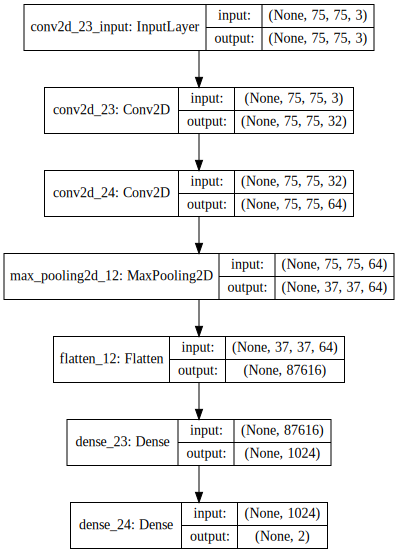

In [53]:
SVG(model_to_dot(model_simple2, show_shapes = True).create(prog = 'dot', format = 'svg'))

In [54]:
model_simple2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [55]:
model_simple2.fit_generator(train_generator, steps_per_epoch = 20000 / BATCH_SIZE, epochs = 20,
                          validation_data = test_generator, validation_steps = 4 * (5000 / BATCH_SIZE))

Epoch 1/20
148/200 [=====================>........] - ETA: 3:08 - loss: 8.0506 - acc: 0.4981

KeyboardInterrupt: 

#### Two attempts

1) I first tried with image size od 224 by 224 (which is the size used by ResNet and VGG16). But this took way too long so I terminated the training

2) Tried with 75 * 75 size and even from the first epoch, it was obvious the model was having issues even from the first epoch; It was not converging very well. So I interuppted the Kernel to move onto next step. 

3) Conclusion I get is that the above is CNN is optimized structure for image size of around 25~30 by 25~30, whic is in the range of Mnist hand digit data size. 

#### Before moving onto utilizing pre-built CNN architecture, I'll give another model (additionaly MaxPooling layer after the first convolution layer) one more go.

In [57]:
np.random.seed(3)
BATCH_SIZE = 100

train_datagen = ImageDataGenerator(rescale = 1 / 255.0)
test_datagen = ImageDataGenerator(rescale = 1 / 255.0)

train_generator = train_datagen.flow_from_directory('./data/train', target_size = (28, 28), 
                                                   batch_size = BATCH_SIZE, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('./data/test', target_size = (28, 28),
                                                 batch_size = BATCH_SIZE, class_mode = 'categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [59]:
model_simple3 = Sequential()

model_simple3.add(Conv2D(32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 3)))
model_simple3.add(MaxPooling2D(pool_size = (2, 2)))

model_simple3.add(Conv2D(64, padding = 'same', kernel_size = (3, 3), activation = 'relu'))
model_simple3.add(MaxPooling2D(pool_size = (2, 2)))

model_simple3.add(Flatten())

model_simple3.add(Dense(1024, activation = 'relu'))

model_simple3.add(Dense(2, activation = 'softmax'))

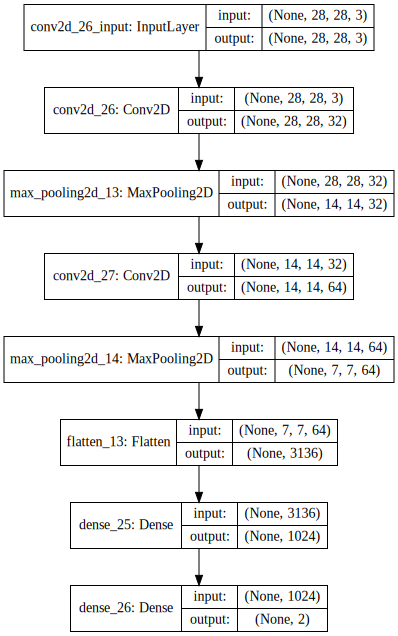

In [60]:
SVG(model_to_dot(model_simple3, show_shapes = True).create(prog = 'dot', format = 'svg'))

In [61]:
model_simple3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [62]:
model_simple3.fit_generator(train_generator, steps_per_epoch = 20000 / BATCH_SIZE, epochs = 20,
                          validation_data = test_generator, validation_steps = 4 * (5000 / BATCH_SIZE))

Epoch 1/20
200/200 [==============================] - 212s 1s/step - loss: 0.6308 - acc: 0.6404 - val_loss: 0.6132 - val_acc: 0.6580
Epoch 2/20
200/200 [==============================] - 155s 773ms/step - loss: 0.5458 - acc: 0.7254 - val_loss: 0.5437 - val_acc: 0.7281
Epoch 3/20
200/200 [==============================] - 163s 814ms/step - loss: 0.4978 - acc: 0.7568 - val_loss: 0.5356 - val_acc: 0.7330
Epoch 4/20
200/200 [==============================] - 149s 746ms/step - loss: 0.4548 - acc: 0.7827 - val_loss: 0.4878 - val_acc: 0.7686
Epoch 5/20
200/200 [==============================] - 149s 744ms/step - loss: 0.4335 - acc: 0.7961 - val_loss: 0.4938 - val_acc: 0.7613
Epoch 6/20
200/200 [==============================] - 144s 722ms/step - loss: 0.3931 - acc: 0.8241 - val_loss: 0.4698 - val_acc: 0.7741
Epoch 7/20
200/200 [==============================] - 145s 724ms/step - loss: 0.3547 - acc: 0.8417 - val_loss: 0.4631 - val_acc: 0.7780
Epoch 8/20
200/200 [==============================]

#### Conclusion on a custom built CNN for image size 28 x 28 

With the added maxpooling layer after first convolution layer, the validation accuracy seems to stabilize a bit near 78%. Other Youtube source who utilized similar architecture achieved a similar result (except they applied DropOut layer which resulted in less overfitting issue with the training accuracy). This is probably the limitation of the algorithm which is unable to capture the complexity of the data itself. As next step, I'll utilize different pre-built ImageNet CNN architectures to make predictions.

#### I could've also reduced batch size to give more update to the model per epoch, but this would've been computationally very expensive.

## 2) Utilizing pre-built VGG16 CNN architecture

UPDATE 1: Initially, I tried with the entire dataset (20000 training images with 5000 test images). But this took way too long to run on my laptop. So I cut down the data size into half. 

UPDATE 2: Even with 10000 images, the training was computationally too expensive for my laptop's CPU. Someone else was able to achieve 90% accuracy with 2000 training data with 800 validation dataset. Since there's no way of knowing if I'll be using the exactly same datasets, the results probably won't be exactly the same. However, I am hoping that they will be within reasonably similar range. The **reference** to the work can be found here:
  * https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [27]:
np.random.seed(3)
'''Since VGG16 requires 224 by 224 input, we will create new ImageGenerator to fit that criteria'''
BATCH_SIZE = 20

train_datagen = ImageDataGenerator(rescale = 1 / 255.0)
test_datagen = ImageDataGenerator(rescale = 1 / 255.0)

train_generator = train_datagen.flow_from_directory('./data/train', target_size = (224, 224), 
                                                   batch_size = BATCH_SIZE, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('./data/test', target_size = (224, 224),
                                                 batch_size = BATCH_SIZE, class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [28]:
'''The vgg16 model was pre-downloaded at the beginning of the project'''
vgg16_model = keras.applications.vgg16.VGG16()

In [29]:
'''Let us take a look at the architectural layotu of VGG16'''
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

#### It is a complex CNN model with 5 Conv + Maxpooling sets followed by 2 dense layers and final output with 1000 categories. For the purpose of Cat vs Dog project, we obviously don't need 1000 category output, hence we will make slight modifications to it to suite our needs.

#### The weights are already pre-trained to perform image classification - all I have to do is to change the last layer.

In [30]:
type(vgg16_model)

keras.engine.training.Model

#### We need to convert the model into a Sequential model as we have done before

In [31]:
model_vgg = Sequential()
for layer in vgg16_model.layers:
    model_vgg.add(layer)

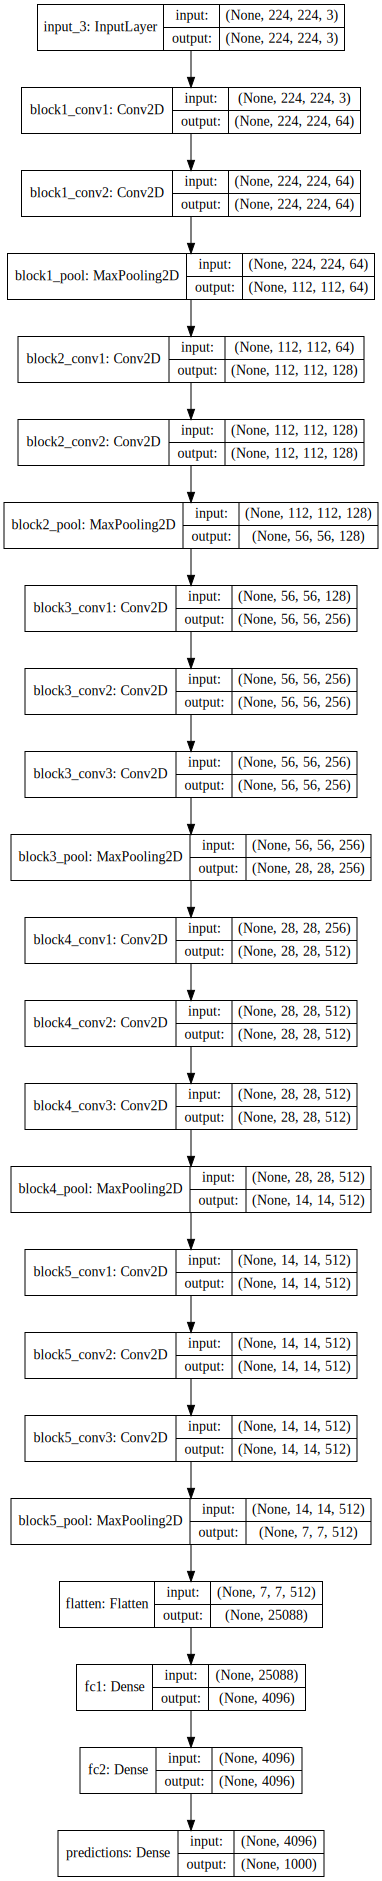

In [32]:
SVG(model_to_dot(model_vgg, show_shapes = True).create(prog = 'dot', format = 'svg'))

In [33]:
'''Let us pop the last model and replace it with binary classification layer'''
model_vgg.layers.pop()

In [34]:
'''Since VGG16 is already a pre-trained model with all the weights updated,
We do NOT want to waste our time re-updating all the weights, especially considering
that it will be computationally very expensive. Hence, all the weights, not including the last
layer, will be frozen from further training.'''
for layer in model_vgg.layers:
    layer.trainable = False

In [35]:
'''Finally, add the last dense layer which can be used for binary classification'''
model_vgg.add(Dense(2, activation = 'softmax'))

In [36]:
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [37]:
model_vgg.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
model_vgg.fit_generator(train_generator, steps_per_epoch = 2000 / BATCH_SIZE, epochs = 5,
                          validation_data = test_generator, validation_steps = 800 / BATCH_SIZE)

Epoch 1/5
100/100 [==============================] - 1417s 14s/step - loss: 0.6436 - acc: 0.7645 - val_loss: 0.6013 - val_acc: 0.8263
Epoch 2/5
100/100 [==============================] - 1408s 14s/step - loss: 0.5698 - acc: 0.8380 - val_loss: 0.5431 - val_acc: 0.8400
Epoch 3/5
100/100 [==============================] - 1355s 14s/step - loss: 0.5138 - acc: 0.8615 - val_loss: 0.5102 - val_acc: 0.8325
Epoch 4/5
100/100 [==============================] - 1415s 14s/step - loss: 0.4704 - acc: 0.8710 - val_loss: 0.4529 - val_acc: 0.8850
Epoch 5/5
100/100 [==============================] - 1409s 14s/step - loss: 0.4526 - acc: 0.8525 - val_loss: 0.4278 - val_acc: 0.8737


#### On the fourth epoch, we achieved validation accuracy of about 88.5% and on the fifth epoch 87.4%, which are fairly comparable results to the results from reference. I'd imagine that, given enough computational power, using the entire dataset would've probably resulted in a better model. However, for demonstration purposes, this shows that a pre-built ImageNet competition model can do fairly decent job even on a relatively small training set. 

#### This time we will try and implement a more efficient pre-built architecture known as InceptionV3

## 3) Utilizing pre-built Xception CNN architecture

#### A paper on Incetion and Xception models. It seems that Xception is an improved version of Inception based on experimentation and further study

  * http://openaccess.thecvf.com/content_cvpr_2017/papers/Chollet_Xception_Deep_Learning_CVPR_2017_paper.pdf

#### Update 1: Unlike VGG16, Xcepption and InceptionV3 cannot be compiled into Sequential model because they have special 'branches'. Instead I need to approach it a little differently as given by the following reference:
  * https://stackoverflow.com/questions/48890758/pre-training-keras-xception-and-inceptionv3-models/48897046#48897046

### Different pre-trained models available in Keras

![title](./imagenet_models.png)

In [39]:
'''InceptionV3 requires input image size of 299 x 299. Hence, we will recreate image generators'''

'''random seed to ensure consistent initial point'''
np.random.seed(3)

'''Since InceptionV3 requires 299 by 299 input, we will create new ImageGenerator to fit that criteria'''
BATCH_SIZE = 20

train_datagen = ImageDataGenerator(rescale = 1 / 255.0)
test_datagen = ImageDataGenerator(rescale = 1 / 255.0)

train_generator = train_datagen.flow_from_directory('./data/train', target_size = (299, 299), 
                                                   batch_size = BATCH_SIZE, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('./data/test', target_size = (299, 299),
                                                 batch_size = BATCH_SIZE, class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [47]:
xception_model = keras.applications.xception.Xception()

In [48]:
xception_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [50]:
type(xception_model)

keras.engine.training.Model

In [55]:
'''As to why I included these two parameters, refer to the reference at the beginning of this section'''
base_model = keras.applications.xception.Xception(include_top = False, pooling = 'avg')

83689472/83683744 [==============================] - 181s 2us/step


In [56]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

#### Some comments about the codes below.

1) Although I followed the answer given in Stackoverflow, I'm still not 100% sure what the pooling = 'avg' parameter does. Other suggestion that was more intuitive to understand was to just inlcude the first parameter to get rid of the final fully connected layer and rebuild GlobalPooling layer and the dense layer.

2) in the line output = Dense(2, activation = 'softmax')(base_model.ouput), the second parantheses indicates the input tensor into that particular layer. And the final model compilation is done using the 'Model' API, which requires the input tensor and output tensor as input to the instantiation.

3) All tensors have .input and .ouput attributes, and some neural network structures even utilize multiple input and output structures.

4) The GlobalPooling layer in the Xception and InceptionV3 frees up the input image size to be anything. This is why when you run the .summary() method on either one of these models, you can see that the dimensions of the images inside the network are specified as **None**.

In [57]:
for layer in base_model.layers:
    layer.trainable = False

In [61]:
output = Dense(2, activation = 'softmax')(base_model.output)

In [66]:
model_xception = Model(base_model.input, output)

In [67]:
model_xception.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [68]:
model_xception.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [69]:
model_xception.fit_generator(train_generator, steps_per_epoch = 2000 / BATCH_SIZE, epochs = 5,
                          validation_data = test_generator, validation_steps = 800 / BATCH_SIZE)

Epoch 1/5
100/100 [==============================] - 1834s 18s/step - loss: 0.2228 - acc: 0.9370 - val_loss: 0.0926 - val_acc: 0.9862
Epoch 2/5
100/100 [==============================] - 1742s 17s/step - loss: 0.0833 - acc: 0.9805 - val_loss: 0.0577 - val_acc: 0.9837
Epoch 3/5
100/100 [==============================] - 1771s 18s/step - loss: 0.0662 - acc: 0.9775 - val_loss: 0.0502 - val_acc: 0.9925
Epoch 4/5
100/100 [==============================] - 1949s 19s/step - loss: 0.0527 - acc: 0.9880 - val_loss: 0.0552 - val_acc: 0.9762
Epoch 5/5
100/100 [==============================] - 1908s 19s/step - loss: 0.0508 - acc: 0.9815 - val_loss: 0.0369 - val_acc: 0.9912


#### Some conclusion and Transfer Learning

Whooping 99% accuracy even on 2000 training images. This general technique of using pre-trained weights is referred to as 'Transfer Learning'. Andrew Ng talks about it in his Deeplearning.AI video as well. The basic idea is that the initial convolution layers and pooling layers have already been trained to pick out traits and interesting edges that can extract important features. The only task left for the developer is to tune the last dense layer that is more customized to the problem at hand - This obviously gets rid of the time and energy consumption needed to train the initial layer. More detailed explanation is given in the reference below:

**Since building a sound CNN structure involves searching for a needle in a haystack, whenever possible, utilize transfer learning to save time and stay sane.**

  * https://medium.com/@galen.ballew/transferlearning-b65772083b47

#### Kaggle Leaderboard 

Looking at the leaderboard on Dogs vs Cats in the Kaggle competition webpage, if my model performs equivalently on the actual test set, it would be first place in the competition. But, considering that the competition took place 4 years ago, there is a good chance Xception was probably not available back then.

## 4) Conclusion

- Custom CNN based on 28 x 28 image size (25,000 training images used; 20,000 actual training and 5,000 validation)
  * 78% validation accuracy
  * 95th on Kaggle LeaderBoard
  
- VGG16 Transfer Learning 224 x 224 image size (2,000 training images and 800 validation images)
  * 87~88% validation accuracy
  * 75th on Kaggle Leaderboard (Notice though the entire dataset wasn't used)
  
- Xception Transfer Learning 299 x 299 image size (2,000 training images and 800 validation images)
  * 99% validation accuracy
  * 1st on Kaggle Leaderboard (Same here, only a portion of the dataset was used)

### Important take home message -> Utilize Transfer Learning!

## References

  * https://pythonprogramming.net/tflearn-machine-learning-tutorial/
  * https://www.youtube.com/watch?v=LhEMXbjGV_4&t=378s
  * 블록과 함께하는 파이썬 딥러닝케라스 by 김태영
  * https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
  * http://openaccess.thecvf.com/content_cvpr_2017/papers/Chollet_Xception_Deep_Learning_CVPR_2017_paper.pdf
  * https://stackoverflow.com/questions/48890758/pre-training-keras-xception-and-inceptionv3-models/48897046#48897046
  * https://medium.com/@galen.ballew/transferlearning-b65772083b47